In [21]:
# Q1
#Read NIRF data as given in Dataset tab on Google Classroom.
import pandas as pd

file = pd.read_csv("../input/nirfra/nirf_engg_ranking_india_2020.csv")
file.head()


,institute_id,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
0,IR-E-U-0456,Indian Institute of Technology Madras,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1
1,IR-E-I-1074,Indian Institute of Technology Delhi,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2
2,IR-E-U-0306,Indian Institute of Technology Bombay,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3
3,IR-E-I-1075,Indian Institute of Technology Kanpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5


In [22]:
# Q2
# Group the data state wise and Count the number of colleges in each state.
state = file.sort_values('state')
print(state,'\n')

colleges = dict()
l = []
count = 0
for item in file['state']:
  l.append(item)
  for college in l:
    colleges[college] = l.count(college)
print("State and Number of colleges corresponding to that state are as follows:\n")
print(colleges)

     institute_id                                               name  \
57    IR-E-U-0020  Koneru Lakshmaiah Education Foundation University   
117   IR-E-U-0043  Vignan's Foundation for Science, Technology & ...   
152   IR-E-U-0037                        Sri Venkateswara University   
189  IR-E-C-26905                  G.Pulla Reddy Engineering College   
187  IR-E-C-17913      Gayatri Vidya Parishad College of Engineering   
..            ...                                                ...   
4     IR-E-U-0573           Indian Institute of Technology Kharagpur   
16    IR-E-U-0575                                Jadavpur University   
156   IR-E-U-0592   Maulana Abul Kalam Azad University of Technology   
190   IR-E-C-6192              Institute of Engineering & Management   
20    IR-E-U-0584  Indian Institute of Engineering Science and Te...   

                                                  link    tlr    rpc     go  \
57   https://nirfcdn.azureedge.net/2020/pdf/Enginee...  

In [23]:
# Q3
#Sort the records based on rpc attribute (Research Professional practices).
rpc = file.sort_values('rpc', ascending = False)
rpp = rpc['name']
index = file['rank']
rpp.index = index
print("Universities Ranks according to RPC is as follows-:\n")
print(rpp)


Universities Ranks according to RPC is as follows-:

rank
1          Indian Institute of Technology Delhi
2         Indian Institute of Technology Madras
3         Indian Institute of Technology Bombay
4      Indian Institute of Technology Kharagpur
5         Indian Institute of Technology Kanpur
                         ...                   
196           G.Pulla Reddy Engineering College
197                 BNM Institute of Technology
198               Vasavi College of Engineering
199                P E S College of Engineering
200                             BVRIT Hyderabad
Name: name, Length: 200, dtype: object


In [24]:
# Q4
# Find the rank of Panjab University as per rpc attribute.
# Any  increment in i value creates a computational error so we have to break on 201.
for i in range(1,201):
  if (rpp[i] == 'Panjab University'):
    print("\n Panjab University Rank according to RPC is :",i)
    break;



 Panjab University Rank according to RPC is : 26


In [25]:
# Q5
#List the colleges whose rpc value is less than Panjab University and rank is higher(rank value is less).
name = file['name']
rate = rpc['rpc']
rate.index = index
l1=[]
l2=[]

for i in range(0,200):
  if (name[i] == "Panjab University"):
    pu_rank = i+1
    break
    
for i in range(0,200):
  if (i+1 < pu_rank):
    l1.append(name[i])

for i in range(1,201):
  if (rpp[i] == "Panjab University"):
    pu_rpc = i
    break
    
for i in range(pu_rpc,93): 
  if (rate[i] < rate[pu_rpc]):
    l2.append(rpp[i])

l3 = [value for value in l1 if value in l2]
print("Universities having lower RPC but a higher Rank than Panjab University are:\n")
for itr in l3:
  print(itr)

Universities having lower RPC but a higher Rank than Panjab University are:

National Institute of Technology Warangal
Indian Institute of Technology Bhubaneswar
National Institute of Technology Calicut
Indian Institute of Technology Gandhinagar
Indian Institute of Technology Ropar
Indian Institute of Technology Patna
Birla Institute of Technology & Science
Indian Institute of Technology Mandi
Indian Institute of Space Science and Technology
Siksha `O` Anusandhan
Malaviya National Institute of Technology
Delhi Technological University
Shanmugha Arts Science Technology & Research Academy
Birla Institute of Technology
National Institute of Technology Kurukshetra
S. R. M. Institute of Science and Technology
Kalinga Institute of Industrial Technology
International Institute of Information Technology Hyderabad
Sri Sivasubramaniya Nadar College of Engineering
Manipal Institute of Technology
National Institute of Technology Silchar
National Institute of Technology Durgapur
Motilal Nehru Natio

<AxesSubplot:ylabel='Frequency'>

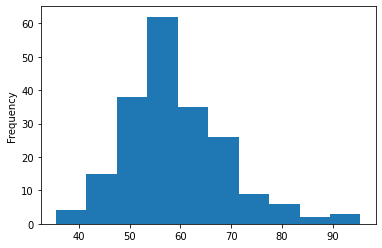

In [26]:
# Q6
#Draw the Histogram for colleges based on tlr values by dividing the overall data in 10 bins.
file['tlr'].plot(kind='hist')